In [45]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import csv
from datetime import datetime
import pytemperature as pyt
# Import API key
from apikey import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [28]:
# List for holding lat_lngs and cities
coordinates = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
coordinates = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for coordinates in coordinates:
    city = citipy.nearest_city(coordinates[0], coordinates[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
print(cities)

624
['butaritari', 'marystown', 'long beach', 'lucapa', 'albany', 'taolanaro', 'harper', 'torbay', 'pangnirtung', 'mys shmidta', 'jiaozuo', 'bredasdorp', 'port macquarie', 'rikitea', 'vaini', 'mataura', 'east london', 'leningradskiy', 'kohima', 'nortelandia', 'carnarvon', 'cape town', 'mandalgovi', 'saskylakh', 'iqaluit', 'longyearbyen', 'chuy', 'ushuaia', 'rio cuarto', 'huicungo', 'bengkulu', 'kurilsk', 'broken hill', 'damara', 'hermanus', 'hobart', 'guerrero negro', 'berlevag', 'avarua', 'tucumcari', 'victoria', 'nizhniy kuranakh', 'hithadhoo', 'olafsvik', 'vreed en hoop', 'lagoa', 'lasa', 'port alfred', 'cidreira', 'tiksi', 'kapit', 'srednekolymsk', 'ponta do sol', 'clyde river', 'atuona', 'burnie', 'kaseda', 'tuktoyaktuk', 'puerto ayora', 'bunia', 'mahajanga', 'grand river south east', 'yumen', 'faya', 'sangar', 'husavik', 'port hardy', 'dikson', 'kapaa', 'busselton', 'severo-kurilsk', 'bara', 'fortuna', 'finschhafen', 'bluff', 'robinson', 'manbij', 'ancud', 'qaanaaq', 'talnakh', '

In [30]:
 humidity =[]
city = []
cloudiness = []
date = []
lat = []
lng = []
max_temp = []
wind_speed = []
    
for i in cities:
   
    #delay requests to abide api regulations
    time.sleep(1)
    unit = 'Imperial'
    citays = i
    query = f"http://api.openweathermap.org/data/2.5/weather?q={citays}&appid={api_key}&unit={unit}"
    row_number = 0
    try:
        data = requests.get(query).json()
        row_number = row_number + 1
        city.append(data['name'])
        lat.append(data['coord']['lat'])
        lng.append(data['coord']['lon'])
        max_temp.append(data['main']['temp_max'])
        cloudiness.append(data['clouds']['all'])
        wind_speed.append(data['wind']['speed'])
        humidity.append(data["main"]["humidity"])
        date.append(data['dt'])
    except:
        pass
        
    #append data to lists
    
    #
    print(f"Processing record {row_number} | {citays}")
   # print(json.dumps(data, indent = 3, sort_keys = True))
    print(query)
#Place data into dataframe
weather_df = pd.DataFrame()
weather_df['City'] = city
weather_df['Latitude'] = lat
weather_df['Longitude'] = lng
weather_df['Max Temp'] = max_temp
weather_df['Cloudiness'] = cloudiness
weather_df['Wind Speed'] = wind_speed
weather_df['Humidity'] = humidity
weather_df['Date'] =date
weather_df['Date'] = pd.to_datetime(weather_df['Date'],unit='s')
weather_df['Max Temp'] = pyt.k2f(weather_df['Max Temp'])
weather_df

Processing record 1 | butaritari
http://api.openweathermap.org/data/2.5/weather?q=butaritari&appid=f009057bb26545ae91d09c50d814bcb9&unit=Imperial
Processing record 1 | marystown
http://api.openweathermap.org/data/2.5/weather?q=marystown&appid=f009057bb26545ae91d09c50d814bcb9&unit=Imperial
Processing record 1 | long beach
http://api.openweathermap.org/data/2.5/weather?q=long beach&appid=f009057bb26545ae91d09c50d814bcb9&unit=Imperial
Processing record 1 | lucapa
http://api.openweathermap.org/data/2.5/weather?q=lucapa&appid=f009057bb26545ae91d09c50d814bcb9&unit=Imperial
Processing record 1 | albany
http://api.openweathermap.org/data/2.5/weather?q=albany&appid=f009057bb26545ae91d09c50d814bcb9&unit=Imperial
Processing record 1 | taolanaro
http://api.openweathermap.org/data/2.5/weather?q=taolanaro&appid=f009057bb26545ae91d09c50d814bcb9&unit=Imperial
Processing record 1 | harper
http://api.openweathermap.org/data/2.5/weather?q=harper&appid=f009057bb26545ae91d09c50d814bcb9&unit=Imperial
Proces

,City,Latitude,Longitude,Max Temp,Cloudiness,Wind Speed,Humidity,Date
0,Butaritari,3.07,172.79,85.63,12,5.07,100,2018-10-28 01:11:28
1,Marystown,47.17,-55.16,40.22,88,3.22,100,2018-10-28 01:15:58
2,Long Beach,30.35,-89.15,64.38,1,1.42,82,2018-10-28 00:53:00
3,Lucapa,-8.42,20.74,68.35,8,1.47,89,2018-10-28 01:16:00
4,Albany,42.65,-73.75,44.58,90,4.10,81,2018-10-28 00:54:00
5,Harper,30.30,-99.24,67.98,1,2.32,60,2018-10-28 00:55:00
6,Torbay,47.66,-52.73,35.58,75,2.60,80,2018-10-28 01:00:00
7,Pangnirtung,66.15,-65.72,23.75,88,2.77,95,2018-10-28 01:16:06
8,Jiaozuo,35.21,113.25,49.36,0,2.67,29,2018-10-28 01:16:08
9,Bredasdorp,-34.53,20.04,66.18,56,5.70,82,2018-10-28 00:00:00


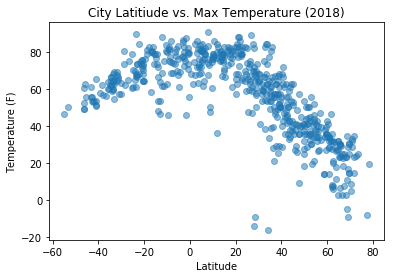

In [32]:
plt.scatter(weather_df["Latitude"],weather_df["Max Temp"], alpha = 0.5)

plt.title("City Latitiude vs. Max Temperature (2018)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.savefig("Temperature.png")
plt.show()

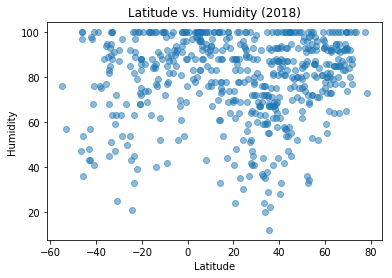

In [36]:
plt.scatter(weather_df["Latitude"],weather_df["Humidity"], alpha = 0.5)

plt.title("Latitude vs. Humidity (2018)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("Humidity.png")
plt.show()

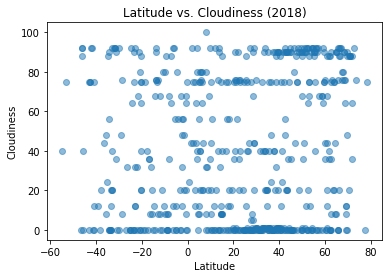

In [39]:
plt.scatter(weather_df["Latitude"],weather_df["Cloudiness"], alpha = 0.5)

plt.title("Latitude vs. Cloudiness (2018)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("Cloudiness.png")
plt.show()

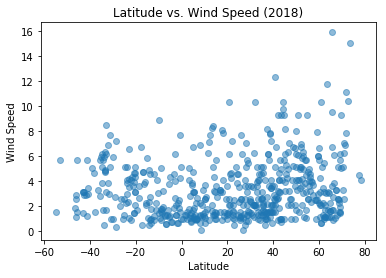

In [43]:
plt.scatter(weather_df["Latitude"],weather_df["Wind Speed"], alpha= 0.5)
plt.title("Latitude vs. Wind Speed (2018)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("Wind Speed.png")
plt.show()

In [46]:
weather_df.to_csv(output_data_file, index=False)